### Image Classification with MNIST data

We start by initially loading Python libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import random

Then we load MNIST database of number images

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
how_many_images = len(x_train)
print('Loaded ' + str(how_many_images) + ' images.')
print('Test set of ' + str(len(x_test)) + ' images.') 

11493376/11490434 [==============================] - 0s 0us/step
Loaded 60000 images.
Test set of 10000 images.


Here we plot one random image:

In [4]:
# Plot one random image
import matplotlib.pyplot as plt
rnd_image_index = random.randrange(0, how_many_images-1)
plt.imshow(x_train[rnd_image_index], cmap="gray")
print('This image should be a(n) ' + str(y_train[rnd_image_index]))

This image should be a(n) 0


In [5]:
# Build predictive model

# 1. Normalize input from 0 to 1 instead of 0 to 255
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# 2. Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(rate=0.8),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# 3. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 4. Train model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.4352 - acc: 0.8656
Epoch 2/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2724 - acc: 0.9186
Epoch 3/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2396 - acc: 0.9295
Epoch 4/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2161 - acc: 0.9334
Epoch 5/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2032 - acc: 0.9396


In [9]:
# 5. Evaluate model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 569us/sample - loss: 0.0978 - acc: 0.9719


[0.09778557328274473, 0.9719]

This image should be a(n) 1


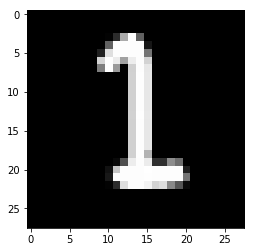

In [14]:
# 6. Get a random image
rnd_image_index = random.randrange(0, how_many_images-1)
random_image = x_train[rnd_image_index]
print('This image should be a(n) ' + str(y_train[rnd_image_index]))
plt.imshow(random_image, cmap="gray")

In [15]:
# 7. Predict
rnd_image = np.array([random_image])
predictions = model.predict(rnd_image)[0].tolist()
guess = predictions.index(max(predictions))
certainty = "{0:.2f}".format(predictions[guess]*100)
print('The image should be a ' + str(guess) + ' with a certainty of ' + certainty + '%')

The image should be a 1 with a certainty of 98.59%
